# 範例 : (Kaggle)房價預測
***
- 以下用房價預測資料, 觀察去除離群值的影響

# [教學目標]
- 以下用房價預測資料, 觀察去除離群值的影響

# [範例重點]
- 觀察原始數值的散佈圖, 以及線性迴歸分數 (In[5], Out[5]) 
- 觀察將極端值以上下限值取代, 對於分布與迴歸分數的影響 (In[6], Out[6])
- 觀察將極端值資料直接刪除, 對於分布與迴歸分數的影響 (In[7], Out[7])

In [1]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data_path = 'data/'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')
#print(df_train['SalePrice'].head(50))

train_Y = np.log1p(df_train['SalePrice'])
#print(train_Y.head(50))
#log1p()：Return the natural logarithm of one plus the input array, element-wise.
#返回元素或輸入數組的自然對數。
#log1p的使用就像是將一個數據壓縮到了一個區間，與數據的標準化類似。
#逆運算為expm1函數。


df = df_train.drop(['Id', 'SalePrice'] , axis=1)
#SalePrice已經取對數處理，所以把原始資料刪掉
df.head()

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64


In [2]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = [] #用來保存我們要取出的數值型欄位，這裡最後只記錄欄位名。
for dtype, feature in zip(df.dtypes, df.columns):
    #資料原始檔為壓縮檔，所以用zip
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

36 Numeric Features : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']



In [3]:
# 削減文字型欄位, 只剩數值型欄位
df = df[num_features] 
#df為刪掉SalePrice的原始資料，我們只要保留數值型欄位。
#所以只保留欄位名在num_features[]中的
#print(df.head())

df = df.fillna(-1) #fillna()填補空值
MMEncoder = MinMaxScaler()
#MinMaxScaler：歸一到[ 0，1 ] 。而MaxAbsScaler：歸一到[ -1，1 ] 。
#MinMaxScaler用來將屬性縮放到一個指定的最大和最小值（通常是1-0）之間，
#這樣處理可對方差非常小的屬性增強其穩定性，也可維持稀疏矩陣中為0的條目。 

df.head()

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64


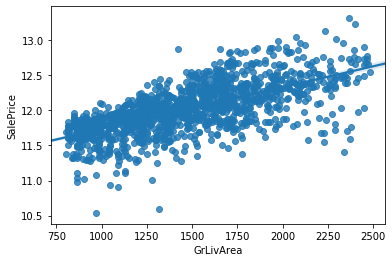

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1344, dtype: int64
[[0.23529412 0.21019108 0.0334198  ... 0.         0.09090909 0.5       ]
 [0.         0.25796178 0.03879502 ... 0.         0.36363636 0.25      ]
 [0.23529412 0.21974522 0.04650728 ... 0.         0.72727273 0.5       ]
 ...
 [0.29411765 0.2133758  0.03618687 ... 0.16129032 0.36363636 1.        ]
 [0.         0.21974522 0.03934189 ... 0.         0.27272727 1.        ]
 [0.         0.24203822 0.04037019 ... 0.         0.45454545 0.5       ]]


In [7]:
# 顯示 GrLivArea 與目標值的散佈圖
import seaborn as sns
#seaborn為python繪圖函式庫，以matplotlib為基礎封裝了許多實用的統計圖表，
#相較於matplotlib，seaborn的預設圖形更為好看，語法更為簡潔，
#並且良好的支援了pandas函式庫



sns.regplot(x = df['GrLivArea'], y=train_Y)
plt.show()
#在這裡，我們告訴seaborn我們要使用train_Y這個資料集作為繪製資料集，
#(前面已經指定train_Y = np.log1p(df_train['SalePrice'])
#並使用df['GrLivArea']繪製關係圖，預設的繪製圖形為散布圖。


# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
#http://www.taroballz.com/2018/07/05/ML_FeaturePreProcessing/
#MMEncoder為MinMaxScaler，每個特徵縮放到給定的範圍內(預設[0,1])，
#這樣可避免某變量尺度過大而使得其他自變量被忽視，並且有助於模型收斂速度加快
#可自己更改normalize的範圍(feature_range(最小值，最大值))。
#fit_transform(X)：#X: numpy array格式的數據[n_samples, n_features]。返回值：轉換後的同shape的array

estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()
#sklearn.model_selection的cross_val_score方法來計算模型的得分，
#cross_val_score交叉驗證及其用於參數選擇、模型選擇、特徵選擇
#scores = cross_val_score(clf, iris.data, iris.target, cv=5,scoring='accuracy')
#這裡用的模型為線性回歸，特徵資料為train_X(原始資料的數值欄位並轉換為0-1)，標籤資料為train_Y
#cv=5是指做了5次學習分析，把資料樣本切割成多個小子集的做多次(5次)測試與訓練，然後取mean()平均值

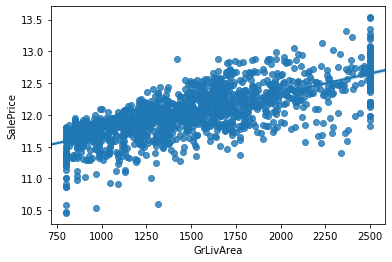

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64
[[0.23529412 0.21019108 0.0334198  ... 0.         0.09090909 0.5       ]
 [0.         0.25796178 0.03879502 ... 0.         0.36363636 0.25      ]
 [0.23529412 0.21974522 0.04650728 ... 0.         0.72727273 0.5       ]
 ...
 [0.29411765 0.2133758  0.03618687 ... 0.16129032 0.36363636 1.        ]
 [0.         0.21974522 0.03934189 ... 0.         0.27272727 1.        ]
 [0.         0.24203822 0.04037019 ... 0.         0.45454545 0.5       ]]


In [5]:
#因為上一步驟的圖型顯示GrLivArea資料集中在800-2500之間。

# 將 df['GrLivArea']的值限制在 800 到 2500 以內, 調整離群值
df['GrLivArea'] = df['GrLivArea'].clip(800, 2500)
#使用clip()函數將數據的值修整到給定閾值內。

sns.regplot(x = df['GrLivArea'], y=train_Y)
plt.show() #再看一次圖形結果

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
#因為GrLivArea欄位取800-2500之間，所以再做一次fit_transform
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

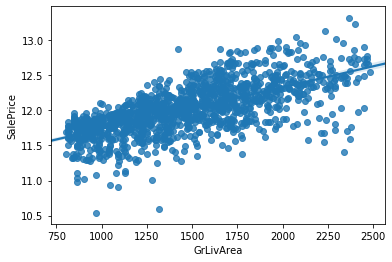

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1344, dtype: int64
[[0.23529412 0.21019108 0.0334198  ... 0.         0.09090909 0.5       ]
 [0.         0.25796178 0.03879502 ... 0.         0.36363636 0.25      ]
 [0.23529412 0.21974522 0.04650728 ... 0.         0.72727273 0.5       ]
 ...
 [0.29411765 0.2133758  0.03618687 ... 0.16129032 0.36363636 1.        ]
 [0.         0.21974522 0.03934189 ... 0.         0.27272727 1.        ]
 [0.         0.24203822 0.04037019 ... 0.         0.45454545 0.5       ]]


In [6]:
#上一步的圖型顯示有離群值。

# 將 GrLivArea 限制在 800 到 2500 以內, 捨棄離群值
keep_indexs = (df['GrLivArea']> 800) & (df['GrLivArea']< 2500) #取出對應的index

df = df[keep_indexs] #以對應的index取出要的資料範圍
train_Y = train_Y[keep_indexs] #以對應的index取出要的資料範圍

sns.regplot(x = df['GrLivArea'], y=train_Y)
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df) 
#以對應的index取出要的資料範圍，所以再做一次fit_transform
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

# 作業1
* 試著限制 '1樓地板面積(平方英尺)' (1stFlrSF) 欄位的上下限, 看看能否再進一步提高分數?

# 作業2
* 續前題, 去除離群值有兩類方式 :  捨棄離群值(刪除離群的資料) 以及調整離群值,  
請試著用同樣的上下限, 改為 '捨棄離群值' 的方法, 看看結果會變好還是變差? 並試著解釋原因。